## A/B Testing of Website Theme Analysis
A/B testing, also known as split testing, is one of the most valuable tools in data analysis. It involves comparing two versions of a subject (such as a webpage, app feature, or marketing strategy) to determine which one performs better based on specific metrics. This method is commonly used in websites and apps to optimize user experience, engagement, and conversion rates.

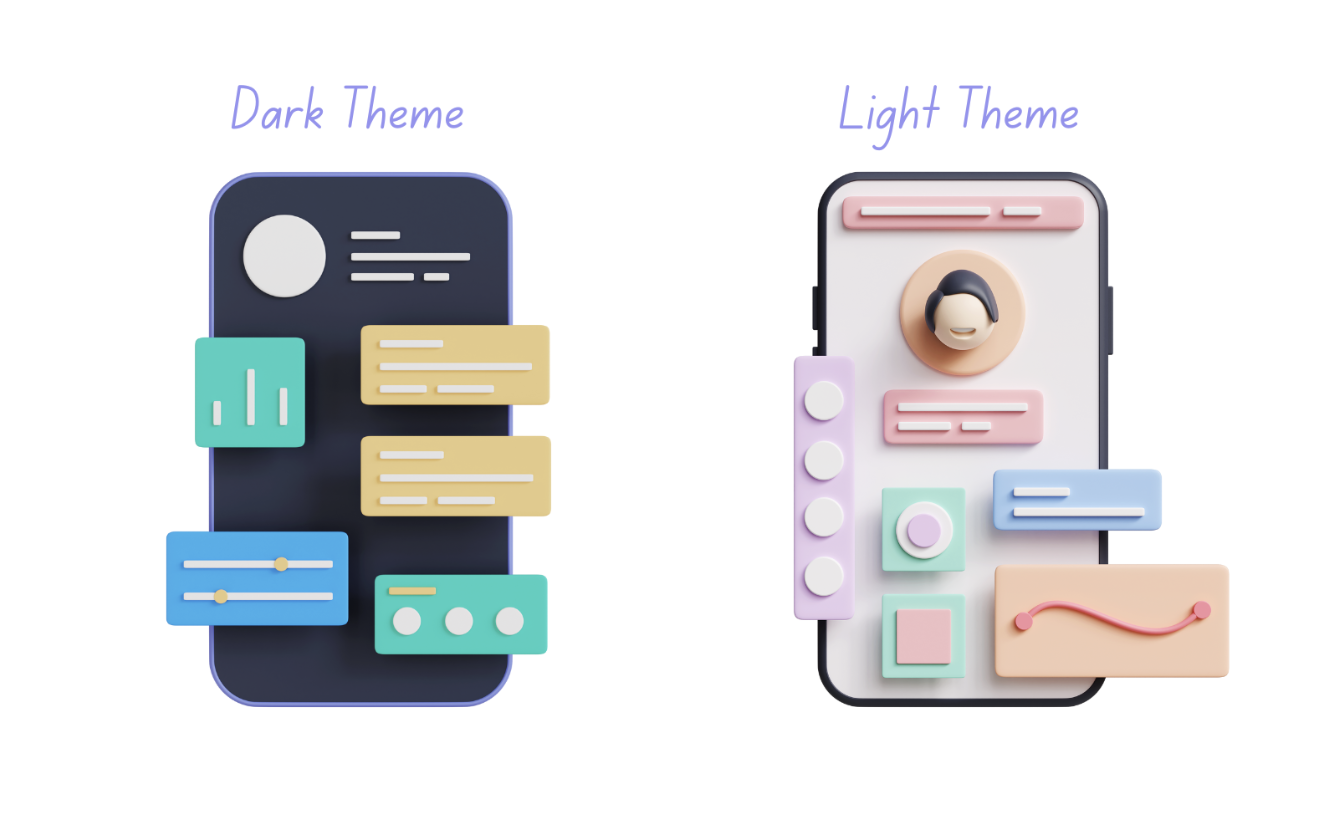

### Data Discription 
An online bookstore is looking to evaluate its website designs, "Light Theme" and "Dark Theme." The client wants to determine which theme can engage more customers and ultimately increase book purchases.

In [ ]:
pip install plotly

In [ ]:
pip install statsmodels 

In [1]:
import pandas as pd 
import plotly.express as px 
import plotly.graph_objects as go 
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/laiyeung/Documents/Website/AB_test/Data/website_ab_test .csv")
print(df.head())

         Theme  Click Through Rate  Conversion Rate  Bounce Rate  \
0  Light Theme            0.054920         0.282367     0.405085   
1  Light Theme            0.113932         0.032973     0.732759   
2   Dark Theme            0.323352         0.178763     0.296543   
3  Light Theme            0.485836         0.325225     0.245001   
4  Light Theme            0.034783         0.196766     0.765100   

   Scroll_Depth  Age   Location  Session_Duration Purchases Added_to_Cart  
0     72.489458   25    Chennai              1535        No           Yes  
1     61.858568   19       Pune               303        No           Yes  
2     45.737376   47    Chennai               563       Yes           Yes  
3     76.305298   58       Pune               385       Yes            No  
4     48.927407   25  New Delhi              1437        No            No  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


Detail of the column:
- Theme: dark or light
- Click Through Rate: The proportion of the users who click on links or buttons on the website.
- Conversion Rate: The percentage of users who signed up on the platform after visiting for the first time.
- Bounce Rate: The percentage of users who leave the website without further interaction after visiting a single page.
- Scroll Depth: The depth to which users scroll through the website pages.
- Age: The age of the user.
- Location: The location of the user.
- Session Duration: The duration of the user’s session on the website.
- Purchases: Whether the user purchased the book (Yes/No).
- Added_to_Cart: Whether the user added books to the cart (Yes/No).

In [5]:
df.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


In [26]:
import plotly.graph_objects as go 

light_theme = df[df['Theme'] == 'Light Theme']
dark_theme = df[df['Theme'] == 'Dark Theme']

light_theme_ctr = light_theme['Click Through Rate'].mean()
dark_theme_ctr = dark_theme['Click Through Rate'].mean()

fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme['Click Through Rate'], name='light_theme', opacity=0.6))
fig.add_trace(go.Histogram(x=dark_theme['Click Through Rate'], name='dark_theme', opacity=0.6))


fig.add_annotation(x=light_theme_ctr, y=0,
                   text=f'Mean: {light_theme_ctr:.2f}',
                   showarrow=True, arrowhead=2,
                   ax=0, ay=-60,
                   bgcolor='steelblue')
fig.add_annotation(x=dark_theme_ctr, y=0,
                   text=f'Mean: {dark_theme_ctr:.2f}',
                   showarrow=True, arrowhead=2,
                   ax=0, ay=-30,
                   bgcolor='tomato')
fig.update_layout(
    title_text = 'Click Through Rate bt Theme',
    xaxis_title_text = 'Click Through Rate',
    yaxis_title_text = 'Frequency',
    barmode = 'group',
    bargap = 0.1
    )
fig.show()

#### Scatter Plot Click Through Rate vs. Conversion Rate

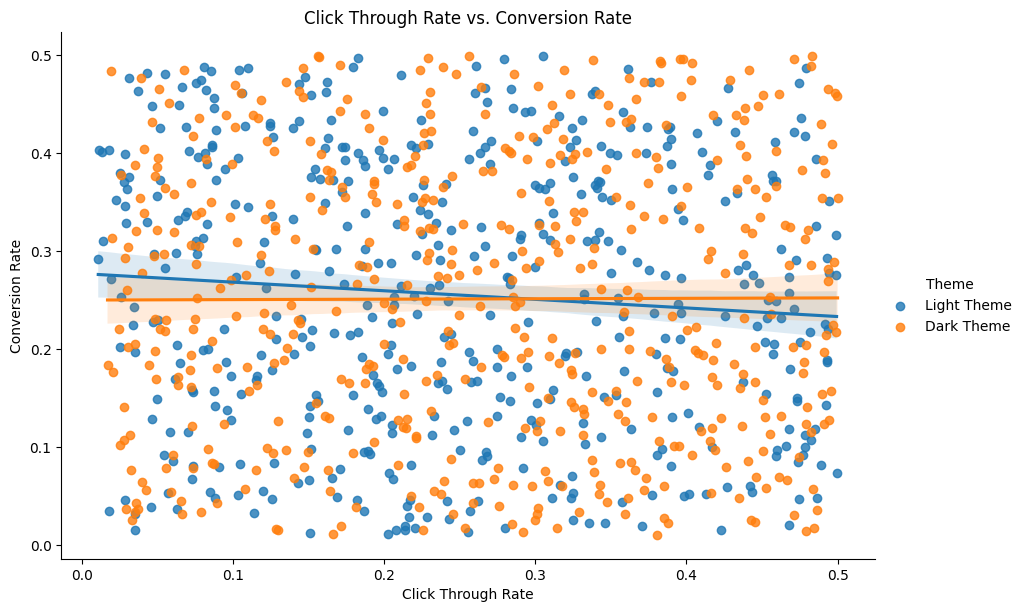

In [8]:
sns.lmplot(x='Click Through Rate', y='Conversion Rate', hue='Theme', data=df, height=6, aspect=1.5)
plt.title('Click Through Rate vs. Conversion Rate')
plt.show()

According the trend line there seems to be a slightly negative relationship between CTR and Conversion Rate across both themes. 
This showing that the increase in Click Through Rate doesn't have strong correspond to a higher Conversion Rate for both theme. Both Light Theme and Dark Theme exhibit similar patterns of data point. 

In summary, this plot indicates that Click Through Rate alone is not a strong predictor of Conversion Rate, and the light and dark themes do not show substantial differences in this relationship.


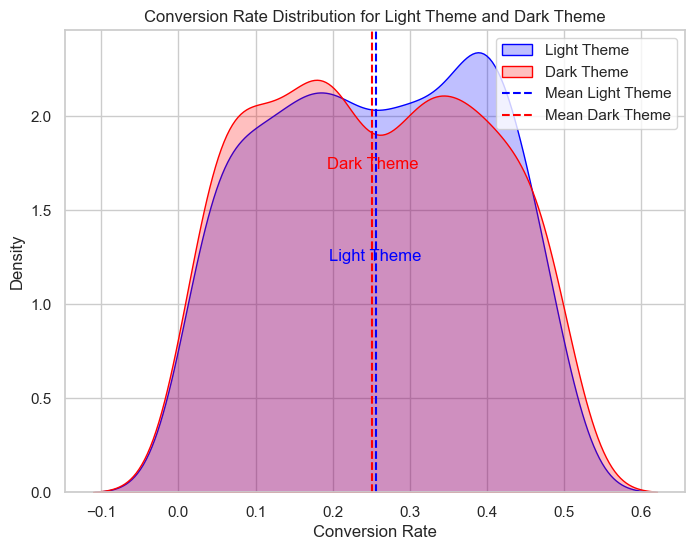

In [12]:
light_theme_conversion = df[df['Theme'] == 'Light Theme']['Conversion Rate']
dark_theme_conversion = df[df['Theme'] == 'Dark Theme']['Conversion Rate']

plt.figure(figsize=(8,6))
sns.kdeplot(light_theme_conversion, color='blue', fill=True, label='Light Theme')
sns.kdeplot(dark_theme_conversion, color='red', fill=True, label='Dark Theme')

# mean
plt.axvline(np.mean(light_theme_conversion), color='blue', linestyle='--', label='Mean Light Theme')
plt.axvline(np.mean(dark_theme_conversion), color='red', linestyle='--', label='Mean Dark Theme')

plt.title('Conversion Rate Distribution for Light Theme and Dark Theme',fontsize=12)
plt.xlabel('Conversion Rate')
plt.ylabel('Density')

# Annotate 
plt.text(np.mean(light_theme_conversion), plt.ylim()[1]*0.5, 'Light Theme', color='blue', ha='center')
plt.text(np.mean(dark_theme_conversion), plt.ylim()[1]*0.7, 'Dark Theme', color='red', ha='center')

plt.legend()
plt.show()

This plot shows the Kernel Density Estimate for Conversiion Rate distuributions of the Light Theme(blue) and Dark Theme(Red), along with their respective means. This hightest peak in blue indicates more users fall within a specific conversion rate range in Light Theme. In the same time there have a large overlap between the two KDE curves shows that there is significant variability in user behavior across both themes. 

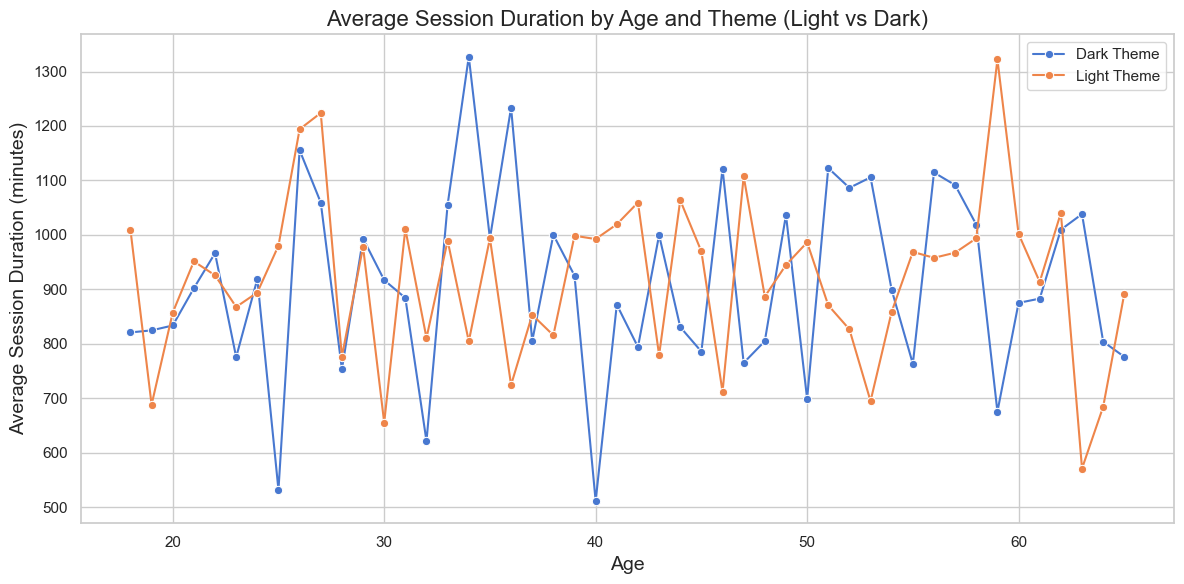

In [10]:
age_theme_grouped = df.groupby(['Age', 'Theme'])['Session_Duration'].mean().reset_index()

mean_light = df[df['Theme'] == 'Light']['Session_Duration'].mean()
mean_dark = df[df['Theme'] == 'Dark']['Session_Duration'].mean()

plt.figure(figsize=(12, 6))

sns.lineplot(data=age_theme_grouped, x='Age', y='Session_Duration', hue='Theme', marker='o', palette='muted')

plt.title('Average Session Duration by Age and Theme (Light vs Dark)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Session Duration (minutes)', fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()

This plot illustrates the relationship between Age and Average Session Duration across two themes: Light and Dark. There is no clear linear trend in session duration as both themes exhibit multiple peaks and drops at different age intervals. 

In particular, for users around the ages of 25 and 40, the Dark theme shows significant declines in session duration, dropping to less than 600 minutes. Conversely, users aged 30 to 40 demonstrate notably high engagement with the Dark theme, with session durations exceeding 1200 minutes at several points. The Light theme, on the other hand, experiences a noticeable peak in user engagement in the late 50s to early 60s, although there is a sharp drop-off in session duration for users over 60.

Both themes display substantial variability in session duration across different age groups, suggesting that age alone does not consistently predict how long users will stay on the website. Interestingly, the Light theme seems to perform better than the Dark theme for younger users under 30 and for those in the 35 to 45 age range. However, the Dark theme appears to attract greater engagement from users between the ages of 45 and 55. 

Overall, engagement with both themes varies significantly across the age spectrum, implying that user behavior is influenced by factors other than age alone, and each theme resonates differently with specific age groups.

### Comparison of Both Themes based on Purchases

/var/folders/vp/cpm13hqx3gl1j588_9sfvf640000gn/T/ipykernel_10879/1140024989.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/vp/cpm13hqx3gl1j588_9sfvf640000gn/T/ipykernel_10879/1140024989.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/vp/cpm13hqx3gl1j588_9sfvf640000gn/T/ipykernel_10879/1140024989.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



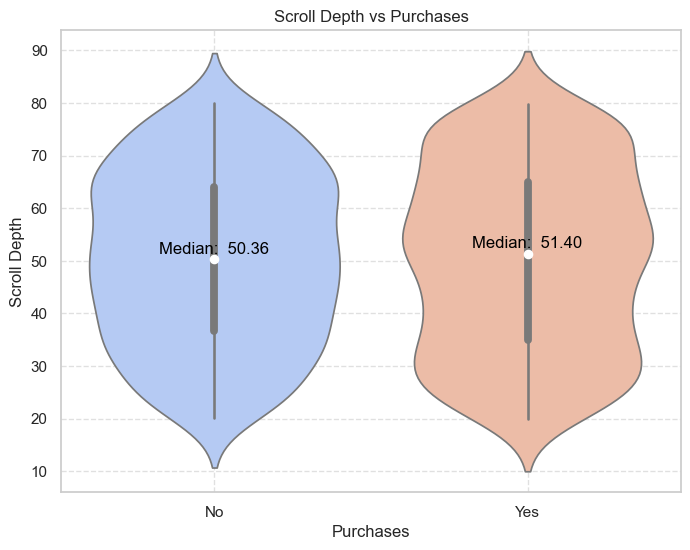

In [9]:
sns.set(style='whitegrid')

plt.figure(figsize=(8,6))
sns.violinplot(x='Purchases', y='Scroll_Depth', data=df,palette='coolwarm')

medians = df.groupby('Purchases')['Scroll_Depth'].median()

for i in range(len(medians)):
    plt.scatter(i, medians[i], color='white', s=35, zorder=3)
    plt.text(i, medians[i] + 1, f'Median:  {medians[i]:.2f}', horizontalalignment='center', color='black', fontsize=12)  

plt.title('Scroll Depth vs Purchases')
plt.xlabel('Purchases')
plt.ylabel('Scroll Depth')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

The objective of this plot is to observe whether users who scroll more tend to purchase more by looking at the distribution and median scroll depth for each purchase group. The median for both groups appears to be slightly above 50, suggest that most of the users tend to scroll at least half way down to the page regardless of whether thay make a purchase. 

### User Purchase and Added to Cart Behavior by Theme

In [5]:
purchase_count = df.groupby('Theme')['Purchases'].value_counts(normalize=True)
cart_addition = df.groupby('Theme')['Added_to_Cart'].value_counts(normalize=True)

print(purchase_count)
print(cart_addition)

Theme        Purchases
Dark Theme   Yes          0.503891
             No           0.496109
Light Theme  Yes          0.530864
             No           0.469136
Name: proportion, dtype: float64
Theme        Added_to_Cart
Dark Theme   Yes              0.519455
             No               0.480545
Light Theme  Yes              0.532922
             No               0.467078
Name: proportion, dtype: float64


The data reveals close proportions between the Dark Theme and Light Theme for both purchase decisions and cart additions.

Purchases
For the Dark Theme, the proportion of users who made a purchase is 50.39%.
The **Light Theme** shows a slightly higher proportion of users making purchases, with 53.09%. While both themes see a relatively even split between users who make purchases and those who don’t, Light Theme demonstrates a small but notable edge in converting users into buyers.

Cart Additions 
While both themes show similar behavior, the **Light Theme** seems to encourage users to add items to their cart marginally more often than the Dark Theme. Users under the Dark Theme added items to their cart 51.95% of the time, whereas 48.05% did not. In the Light Theme, 53.29% of users added items to their cart, slightly higher than the 46.71% who did not.

Overall, although the differences between the two themes are relatively small, Light Theme performs slightly better in both user purchases and cart additions. This may suggest that users find the Light Theme more conducive to making purchases and engaging with the cart feature. However, given the close results, further analysis is nessary to determine. 

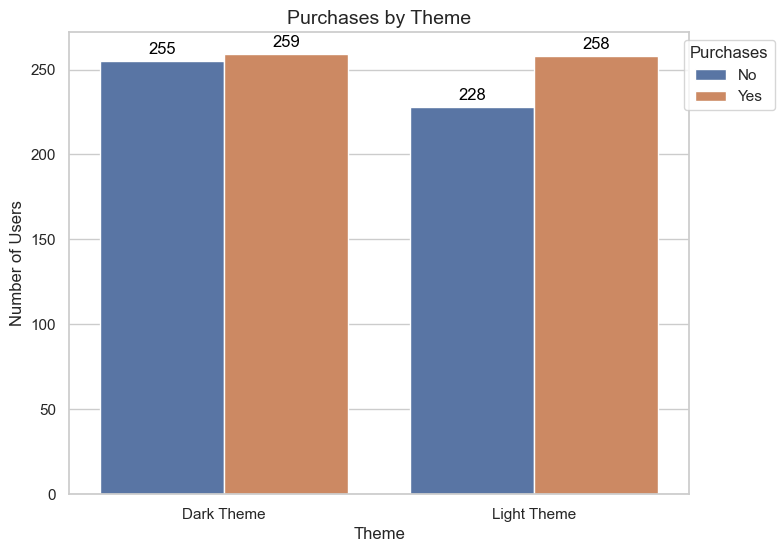

In [38]:
purchase_count = df.groupby(['Theme', 'Purchases']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Theme', y='Count', hue='Purchases', data=purchase_count)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black', padding=3)

plt.title('Purchases by Theme', fontsize=14)
plt.ylabel('Number of Users')
plt.legend(title='Purchases', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


In [14]:
light_theme_conversions = light_theme[light_theme['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme.shape[0]

dark_theme_conversions = dark_theme[dark_theme['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme.shape[0]

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

# Perform two-sample proportion test
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B Testing - z-statistic: 0.8531246206222649  p-value: 0.39359019934127804


The results show a comparison of the conversion rates between the Light and Dark Themes, in the result Light theme conversion rate 53.09% is slightly highter than Dark theme conversion rate 50.39%. However, the difference between these conversion rates is not substantial.

In this case, the z-statistic show as 0.8531, represent standard deviations the difference between the two conversion rate. Here the result is close to 0 indicating the different between the Light Theme and Dark Theme conversion rates is not substantial. 

The p-value of 0.394 is much higher than the typical significance level of 0.05. This indicates that the difference in conversion rates between the Light and Dark themes is not statistically significant. In other words, there is no strong evidence to suggest that one theme leads to significantly higher conversions than the other. The observed difference could be due to random chance rather than a true effect.

### Summary
This A/B testing project comparing the Light and Dark Themes for a website revealed only minor differences in performance. The Light Theme slightly outperformed the Dark Theme in terms of Click Through Rate, Purchases, and Cart Additions, but these differences were not statistically significant.

Scroll Depth was consistent across users who made purchases and those who did not, suggesting that scrolling behavior might not strongly influence purchasing decisions. Regarding Age, both themes showed varying session durations: the Dark Theme exhibited strong engagement among middle-aged users, while the Light Theme performed better with younger and older users. Overall, neither theme demonstrated a clear advantage, indicating that factors beyond theme choice may play a more significant role in user engagement and conversions.

To improve future experiments, we should consider increasing the sample size, as the lack of statistical significance could stem from insufficient data. A larger sample size would help reduce variability and yield more reliable results. Additionally, targeting specific age groups for analysis could provide insights into which theme resonates more with certain demographics.

It is also recommended to track additional metrics, such as the time spent on the website before making a purchase, rather than focusing solely on conversion rates. This will provide a more comprehensive understanding of user behavior and engagement.